In [1]:
#Set up workspace
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pysal
import statsmodels.api as sm
from pysal.lib.weights import W, lat2W
from pysal.lib.common import KDTree
import os
import statsmodels.api as sm
from statsmodels.regression.linear_model import RegressionResults
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import seaborn.apionly as sns
from collections import Counter

/Users/filipmichalsky/anaconda3/envs/my_tf_env/lib/python3.6/site-packages/pysal/lib/weights/util.py:19: UserWarning: geopandas not available. Some functionality will be disabled.
  warn('geopandas not available. Some functionality will be disabled.')
/Users/filipmichalsky/anaconda3/envs/my_tf_env/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/filipmichalsky/anaconda3/envs/my_tf_env/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/Users/filipmichalsky/anaconda3/envs/my_tf_env/lib/python3.6/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on impo

In [2]:
#Suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#Miami = pd.read_csv('MunRoll - 00 RE - All Properties.csv')
Miami = pd.read_csv('Miami_geocoded.csv')

len(Miami)

916460

In [4]:
Miami.head()

,Longitude,Latitude,Property_Address,Property_City,Property_Zip,Year,Land,Bldg,Total,Assessed,...,Sale_Qual_3,Sale_Date_3,Sale_Amt_3,XF1,XF2,XF3,LivingSqFt,ActualSqFt,Field64,Field65
0,-80.190,25.767,NaN,Miami,33131-2103,2018.000,22574250.000,6789.000,22581039.000,15423779.000,...,Q,9/1/2003 0:00,8800000.000,Paving - Asphalt,Light Standard - 10-30 ft High - 4 Fixtures,NaN,0.000,0.000,nan,nan
1,-80.192,25.777,245 NE 1 AVE,Miami,33132-0000,2018.000,0.000,0.000,347164191.000,347164191.000,...,NaN,NaN,nan,NaN,NaN,NaN,0.000,0.000,nan,nan
2,-80.216,25.796,1250 NW 21 ST,Miami,33142-7753,2018.000,0.000,0.000,10000000.000,8794500.000,...,NaN,NaN,nan,NaN,NaN,NaN,463024.000,463024.000,nan,nan
3,-80.192,25.772,60 SE 2 ST,Miami,33131-2103,2018.000,6553600.000,0.000,6553600.000,4197867.000,...,Q,9/1/2003 0:00,8800000.000,NaN,NaN,NaN,0.000,0.000,nan,nan
4,-80.187,25.783,801 BISCAYNE BLVD,Miami,33132-6142,2018.000,25556700.000,12600.000,25569300.000,7042106.000,...,NaN,NaN,nan,Patio - Concrete Slab,NaN,NaN,0.000,0.000,nan,nan


In [6]:
Miami.shape

(916460, 66)

In [16]:
Miami.loc[(Miami['Property_Address'].isnull()) & (Miami['Longitude'].isnull()),:]

,Longitude,Latitude,Property_Address,Property_City,Property_Zip,Year,Land,Bldg,Total,Assessed,...,Sale_Qual_3,Sale_Date_3,Sale_Amt_3,XF1,XF2,XF3,LivingSqFt,ActualSqFt,Field64,Field65


In [9]:
Miami.columns

Index(['Longitude', 'Latitude', 'Property_Address', 'Property_City',
       'Property_Zip', 'Year', 'Land', 'Bldg', 'Total', 'Assessed', 'WVDB',
       'HEX', 'GPAR', 'County_2nd_HEX', 'County_Senior',
       'County_LongTermSenior', 'County_Other_Exempt', 'County_Taxable',
       'City_2nd_HEX', 'City_Senior', 'City_LongTermSenior',
       'City_Other_Exempt', 'City_Taxable', 'MillCode', 'Land_Use', 'Zoning',
       'Owner1', 'Owner2', 'Mailing_Address', 'Mailing_City', 'Mailing_State',
       'Mailing_Zip', 'Mailing_Country', 'Legal1', 'Legal2', 'Legal3',
       'Legal4', 'Legal5', 'Legal6', 'AdjustedSqFt', 'LotSize', 'Bed', 'Bath',
       'Stories', 'Units', 'YearBuilt', 'EffectiveYearBuilt', 'Sale_Type_1',
       'Sale_Qual_1', 'Sale_Date_1', 'Sale_Amt_1', 'Sale_Type_2',
       'Sale_Qual_2', 'Sale_Date_2', 'Sale_Amt_2', 'Sale_Type_3',
       'Sale_Qual_3', 'Sale_Date_3', 'Sale_Amt_3', 'XF1', 'XF2', 'XF3',
       'LivingSqFt', 'ActualSqFt', 'Field64', 'Field65'],
      dtype='objec

In [17]:
# Drop Nan Address
# Miami_df = Miami.dropna(subset=['Property_Address'])
# NOTE: we can geocode the missing addresses with LAT/LONG!

In [18]:
#Subset just the relevant fields for this project
rel_fields = ['Longitude','Latitude','Property_Address','Property_City','Property_Zip','Year','Land','Bldg','Total','Assessed','Land_Use',
              'Zoning','AdjustedSqFt','LotSize','Bed','Bath','Stories','Units','YearBuilt','EffectiveYearBuilt',
             'Sale_Type_1','Sale_Type_2','Sale_Type_3',
              'Sale_Date_1','Sale_Amt_1','Sale_Date_2','Sale_Amt_2','Sale_Date_3','Sale_Amt_3','LivingSqFt','ActualSqFt']



In [19]:
len(rel_fields)

31

In [21]:
Miami_df = Miami[rel_fields]

In [22]:
#Subset just those properties that have had at least one recorded sale
Miami_sales = Miami_df.dropna(subset=['Sale_Amt_1'])

In [27]:
land_uses = Miami_sales.Land_Use.unique().tolist()

In [33]:
codes, descr = [],[]
codes = [i[:4] for i in land_uses]
descr = [i[7:] for i in land_uses]

In [35]:
land_uses_df = pd.DataFrame.from_dict({'codes':codes,'description':descr})

In [37]:
land_uses_df.to_csv('Land_use_codes.csv')

In [39]:
#Let's subset just residential properties
res_uses = ['8907 - MUNICIPAL : CONDOMINIUM - RESIDENTIAL','0007 - VACANT RESIDENTIAL: CONDO','0102 - RESIDENTIAL - SINGLE FAMILY : ADDITIONAL LIVING QUARTERS',
           '0104 - RESIDENTIAL - SINGLE FAMILY : RESIDENTIAL - TOTAL VALUE','8607 - COUNTY : CONDOMINIUM - RESIDENTIAL',
           '0105 - RESIDENTIAL - SINGLE FAMILY : CLUSTER HOME','0081 - VACANT RESIDENTIAL : VACANT LAND','0101 - RESIDENTIAL - SINGLE FAMILY : 1 UNIT',
           '0470 - RESIDENTIAL - TOTAL VALUE : TOWNHOUSE W/ ADDITIONAL LIVING QUARTERS','5001 - IMPR AGRI : RESIDENTIAL - SINGLE FAMILY',
           '0066 - VACANT RESIDENTIAL : EXTRA FEA OTHER THAN PARKING','0508 - COOPERATIVE - RESIDENTIAL : COOPERATIVE - RESIDENTIAL',
           '0423 - RESIDENTIAL - TOTAL VALUE : CONDOMINIUM - TIMESHARING','1211 - MIXED USE-STORE/RESIDENTIAL : RETAIL OUTLET',
           '1209 - MIXED USE-STORE/RESIDENTIAL : MIXED USE - RESIDENTIAL','0724 - MISCELLANEOUS - RESIDENTIAL : CAMPSITE',
           '0451 - RESIDENTIAL - TOTAL VALUE : COMMON AREAS','8807 - FEDERAL : CONDOMINIUM - RESIDENTIAL','0420 - RESIDENTIAL - TOTAL VALUE : DOCK - TOTAL VALUE',
           '5009 - IMPR AGRI - NOT HOMESITES : MIXED USE - RESIDENTIAL','0410 - RESIDENTIAL - TOTAL VALUE : TOWNHOUSE','0407 - RESIDENTIAL - TOTAL VALUE : CONDOMINIUM - RESIDENTIAL',
           '0709 - MISCELLANEOUS - RESIDENTIAL : MIXED USE - RESIDENTIAL','8601 - COUNTY : RESIDENTIAL - SINGLE FAMILY','0005 - VACANT RESIDENTIAL : CLUSTER HOME',
           '1229 - MIXED USE-STORE/RESIDENTIAL : MIXED USE - COMMERCIAL']


In [43]:
# filip: res uses augmented
res_uses = pd.read_csv('Land_use_codes.csv')

In [44]:
res_uses = res_uses.loc[res_uses['residential_use']==1,'codes']

In [46]:
res_uses = res_uses.values.tolist()

In [60]:
Miami_sales['Land_Use'].apply(lambda x: x[:4]).isin(res_uses)

False

In [62]:
#Get the residential subset (we can see that this is most of the dataset)
resi_sales = Miami_sales[Miami_sales['Land_Use'].apply(lambda x: int(x[:4])).isin(res_uses)]

In [63]:
resi_sales.shape

(753095, 31)

In [64]:
#Let's clean the data of obvious mistakes so that we can do EDA

#Get rid of mistakes in year built
eda_df = resi_sales[resi_sales['YearBuilt']>1900]
eda_df = eda_df[eda_df['YearBuilt']<2020]

#...Sale Price
eda_df = eda_df[eda_df['Sale_Amt_1']<40000000]
eda_df = eda_df[eda_df['Sale_Amt_1']>10000]

#...SF
eda_df = eda_df[pd.to_numeric(eda_df['ActualSqFt'],errors='coerce').notnull()] 
eda_df['ActualSqFt'] = eda_df['ActualSqFt'].convert_objects(convert_numeric=True).dropna()
eda_df['ActualSqFt'] = eda_df['ActualSqFt'].astype(float)
#eda_df = eda_df[eda_df['ActualSqFt'].apply(lambda x: x.isnumeric())]

eda_df = eda_df[eda_df['ActualSqFt']<20000]
eda_df = eda_df[eda_df['ActualSqFt']>0]

#Add a Price Per Square Foot column
eda_df['PPSF']=eda_df['Sale_Amt_1']/eda_df['ActualSqFt']
eda_df = eda_df.dropna(subset=['PPSF'])

eda_df = eda_df[eda_df['PPSF']<5000]
eda_df = eda_df[eda_df['PPSF']>0]

eda_df = eda_df[eda_df['Longitude']>-82]
eda_df = eda_df[eda_df['Latitude']<27]

len(eda_df)

/Users/filipmichalsky/anaconda3/envs/my_tf_env/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  del sys.path[0]


529110

Let's do some EDA

(1910, 2018)

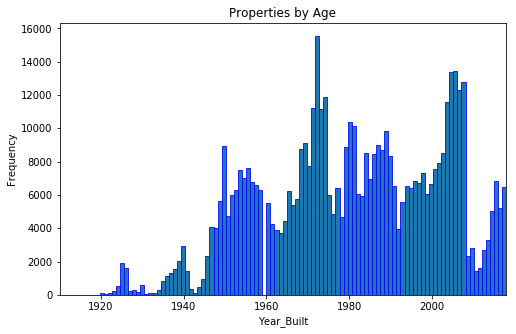

In [68]:
#Building Age
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.hist(eda_df.YearBuilt,bins=120,edgecolor='blue', linewidth=0.8)
ax.set_xlabel('Year_Built')
ax.set_ylabel('Frequency')
ax.set_title('Properties by Age')
ax.set_xlim([1910,2018])

Note the cyclicality implied in the chart above - clearly, there are cycles of intense construction followed by collapses. This could be an interesting thing to explore. 

(10000, 1500000)

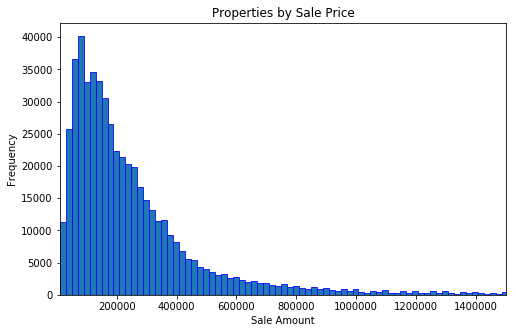

In [71]:
#Latest Sale Price
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.hist(eda_df['Sale_Amt_1'],bins=2000,edgecolor='blue', linewidth=0.8)
ax.set_xlabel('Sale Amount')
ax.set_ylabel('Frequency')
ax.set_title('Properties by Sale Price')
ax.set_xlim([10000,1500000])

(100, 6000)

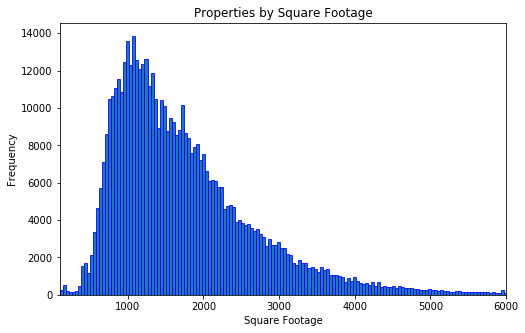

In [73]:
#Square Footage
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.hist(eda_df['ActualSqFt'],bins=500,edgecolor='blue', linewidth=0.8)
ax.set_xlabel('Square Footage')
ax.set_ylabel('Frequency')
ax.set_title('Properties by Square Footage')
ax.set_xlim([100,6000])

(0, 1000)

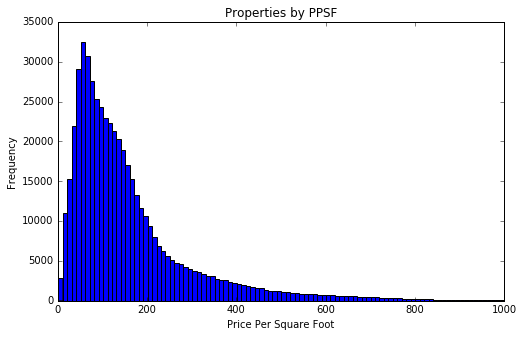

In [14]:
#PPSF
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.hist(eda_df['PPSF'],bins=500)
ax.set_xlabel('Price Per Square Foot')
ax.set_ylabel('Frequency')
ax.set_title('Properties by PPSF')
ax.set_xlim([0,1000])

In [74]:
eda_df.columns

Index(['Longitude', 'Latitude', 'Property_Address', 'Property_City',
       'Property_Zip', 'Year', 'Land', 'Bldg', 'Total', 'Assessed', 'Land_Use',
       'Zoning', 'AdjustedSqFt', 'LotSize', 'Bed', 'Bath', 'Stories', 'Units',
       'YearBuilt', 'EffectiveYearBuilt', 'Sale_Type_1', 'Sale_Type_2',
       'Sale_Type_3', 'Sale_Date_1', 'Sale_Amt_1', 'Sale_Date_2', 'Sale_Amt_2',
       'Sale_Date_3', 'Sale_Amt_3', 'LivingSqFt', 'ActualSqFt', 'PPSF'],
      dtype='object')

In [79]:
eda_df.Latitude.head()

739   25.777
743   25.776
747   25.776
749   25.776
789   25.775
Name: Latitude, dtype: float64

In [108]:
#Let's try plotting some heatmaps

def plot_heatmap(df,value,colors='Blues',gridsize=80,title='Map',cb_label='Scale',
                vmin=0,vmax=1000):
    long = df['Longitude'].values
    lat = df['Latitude'].values
    
    margin = .04 # buffer to add to the range

    y_min = min(lat) - margin
    y_max = max(lat) + margin
    x_min = min(long) - margin
    x_max = max(long) + margin
    #print(x_min,x_max,y_min,y_max)
    if value!='Abs_Residuals':
        fig = plt.figure(figsize=(27,20))
        ax = fig.add_subplot(221)
        #ax.hexbin(df['DisplayX'],df['DisplayY'],df[value]*100, vmin=-100, vmax=100,gridsize=gridsize, cmap=colors)
        ax.hexbin(df['Longitude'],df['Latitude'],df[value],vmin=vmin,vmax=vmax,gridsize=gridsize, cmap=colors)
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.set_title(title)
    
        #hb = ax.hexbin(df['DisplayX'],df['DisplayY'],df[value]*100, vmin=-100, vmax=100,gridsize=gridsize, cmap=colors)
        hb = ax.hexbin(df['Longitude'],df['Latitude'],df[value], vmin=vmin,vmax=vmax,gridsize=gridsize, cmap=colors)
        cb = fig.colorbar(hb, ax=ax)
        cb.set_label(cb_label)
        #ax.colorbar(hb, ax=ax)
        plt.ylim(25.3, 26)
        plt.xlim(-80.7, -80.1)
    else:
        fig = plt.figure(figsize=(27,20))
        ax = fig.add_subplot(221)
        ax.hexbin(df['Longitude'],df['Latitude'],df[value]*100, vmin=vmin,vmax=vmax,gridsize=gridsize, cmap=colors)
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.set_title(title)
    
        hb = ax.hexbin(df['Longitude'],df['Latitude'],df[value]*100, vmin=vmin,vmax=vmax,gridsize=gridsize, cmap=colors)
        cb = fig.colorbar(hb, ax=ax)
        cb.set_label(cb_label)
        #ax.colorbar(hb, ax=ax)
        ax.set_ylim([y_min, y_max])
        ax.set_xlim([x_min, x_max])       
    
    plt.show()

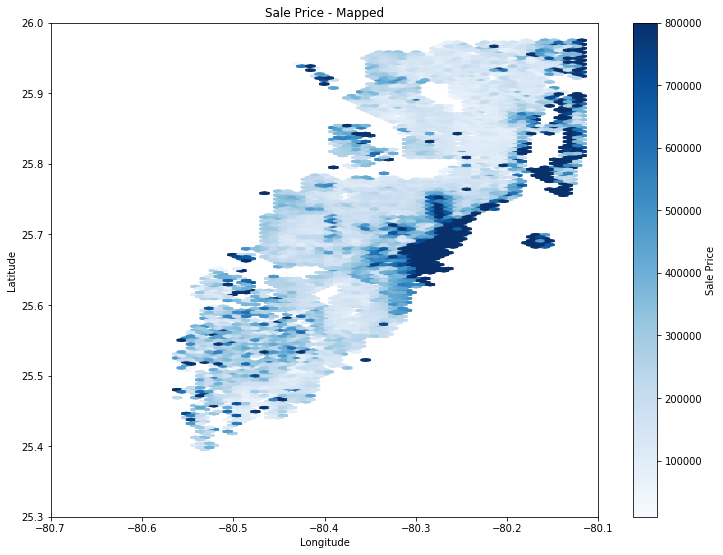

In [110]:
plot_heatmap(eda_df,value='Sale_Amt_1',gridsize=8000,vmin=10000,vmax=800000,title="Sale Price - Mapped",cb_label = 'Sale Price')

In [ ]:
plot_heatmap(eda_df,value='PPSF',gridsize=8000,vmin=0,vmax=300,title="PPSF - Mapped",cb_label = 'PPSF')

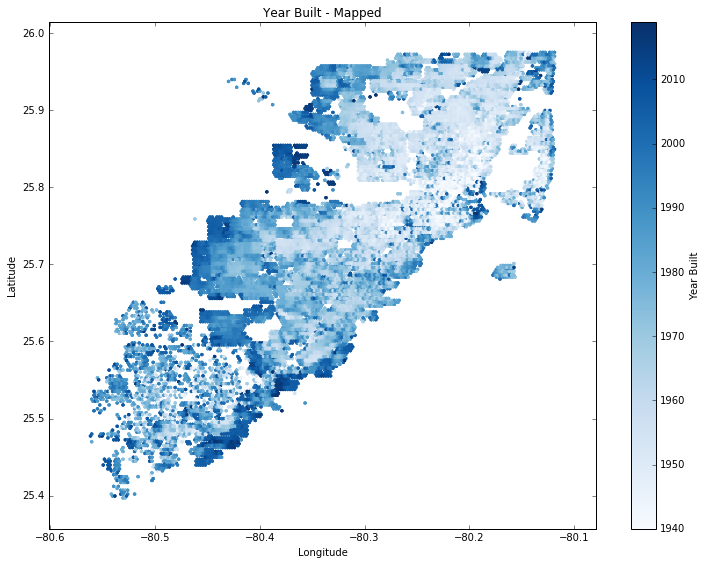

In [19]:
plot_heatmap(eda_df,value='YearBuilt',gridsize=200,vmin=1940,vmax=2019,title="Year Built - Mapped",cb_label = 'Year Built')